In [1]:
# PRAKASH NIDHI VERMA (Markel-Sokarti, Data Science - Assignment)

#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# df = pd.read_excel(open('dataset_sokrati.xlsx', 'rb'),sheet_name='Assignment-1')
# df.head(10)

#Convert dataformate into csv for better experience and read it
df = pd.read_csv('data.csv')
df.head(4)


,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0


In [3]:
df.shape

(16834, 16)

In [4]:
df.columns

Index(['Date', 'product', 'phase', 'campaign_platform', 'campaign_type',
       'communication_medium', 'subchannel', 'audience_type', 'creative_type',
       'creative_name', 'device', 'age', 'spends', 'impressions', 'clicks',
       'link_clicks'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
Date                    16834 non-null object
product                 16834 non-null object
phase                   16834 non-null object
campaign_platform       16834 non-null object
campaign_type           16834 non-null object
communication_medium    16834 non-null object
subchannel              16834 non-null object
audience_type           16834 non-null object
creative_type           16834 non-null object
creative_name           16834 non-null object
device                  16834 non-null object
age                     16834 non-null object
spends                  16834 non-null float64
impressions             16834 non-null int64
clicks                  16834 non-null int64
link_clicks             16288 non-null float64
dtypes: float64(2), int64(2), object(12)
memory usage: 2.1+ MB


In [6]:
df.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


In [7]:
df.creative_type.dtype

dtype('O')

In [8]:
#descriptive statistics summary

df.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


count    16834.000000
mean       148.694236
std        483.895724
min          0.000000
25%          0.180000
50%         22.535000
75%        110.020000
max       9221.960000
Name: spends, dtype: float64


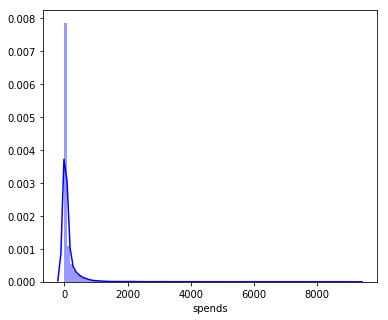

In [9]:
print(df['spends'].describe())
plt.figure(figsize=(6, 5))
sns.distplot(df['spends'], color='b', bins=100, hist_kws={'alpha': 0.4});


In [10]:
#skewness and kurtosis
print("Skewness: %f" % df['spends'].skew())
print("Kurtosis: %f" % df['spends'].kurt())

Skewness: 9.615593
Kurtosis: 124.771401


# Numerical data distribution analysis

In [11]:
# missing data

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)



,Total,Percent
link_clicks,546,0.032434
clicks,0,0.000000
impressions,0,0.000000
spends,0,0.000000
age,0,0.000000
device,0,0.000000
creative_name,0,0.000000
creative_type,0,0.000000
audience_type,0,0.000000
subchannel,0,0.000000


In [12]:
 df.fillna(df.mean())

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0
5,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,285.38,61,10,0.0
6,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,331.70,36,10,0.0
7,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,45-54,0.00,4,0,0.0
8,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,55-64,108.81,8,4,0.0
9,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,65 or more,0.00,2,0,0.0


In [13]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,spends,impressions,clicks,link_clicks
0,0.00,2,0,0.0
1,0.00,5,0,0.0
2,0.00,1,0,0.0
3,14.63,5,3,0.0
4,53.31,10,2,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49410a6eb8>,
      dtype=object)

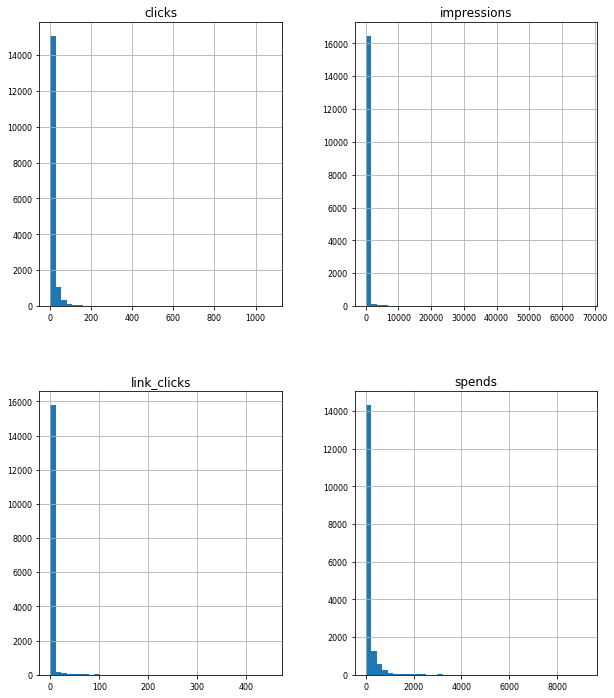

In [15]:
df_num.hist(figsize=(10, 12), bins=40, xlabelsize=8, ylabelsize=8)

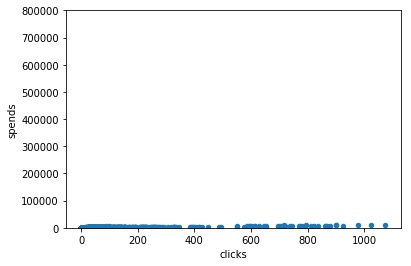

In [16]:
#scatter plot for spends

var = 'clicks'
data = pd.concat([df['spends'], df[var]], axis=1)
data.plot.scatter(x=var, y='spends', ylim=(0,800000));

In [17]:
#Seeking for the corelation between data

df_num_corr = df_num.corr()['spends']
features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Spends:\n{}".format(len(features_list), features_list))

There is 4 strongly correlated values with Spends:
spends         1.000000
clicks         0.838371
impressions    0.744552
link_clicks    0.697201
Name: spends, dtype: float64


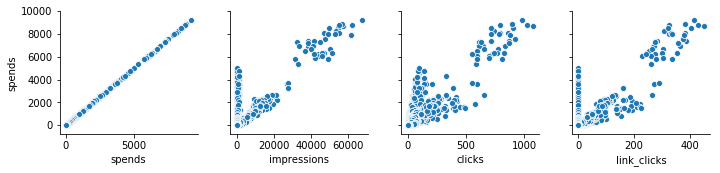

In [18]:
# Relation ship in data distribution (Outliers)

for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,x_vars=df_num.columns[i:i+5],y_vars=['spends'])

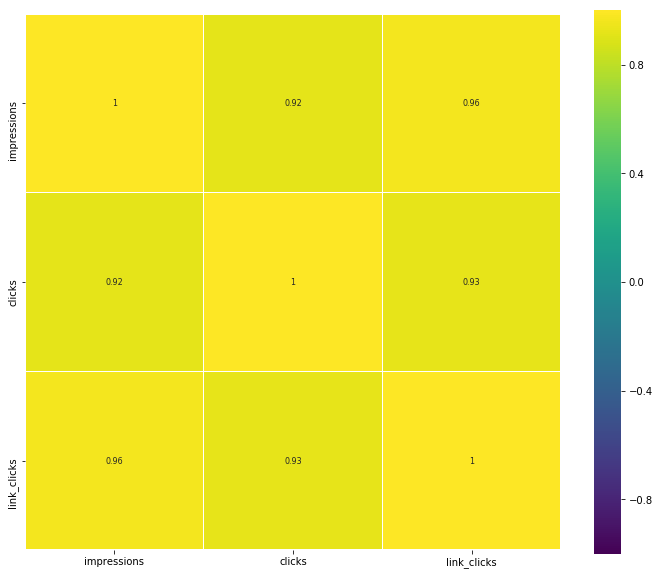

In [19]:
corr = df_num.drop('spends', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [20]:
# Quantitative to quantitative relationship Analysis


quant_feature_list = ['spends', 'impressions', 'clicks','link_clicks']
df_quant_values = df[quant_feature_list]
df_quant_values.head()

,spends,impressions,clicks,link_clicks
0,0.00,2,0,0.0
1,0.00,5,0,0.0
2,0.00,1,0,0.0
3,14.63,5,3,0.0
4,53.31,10,2,0.0


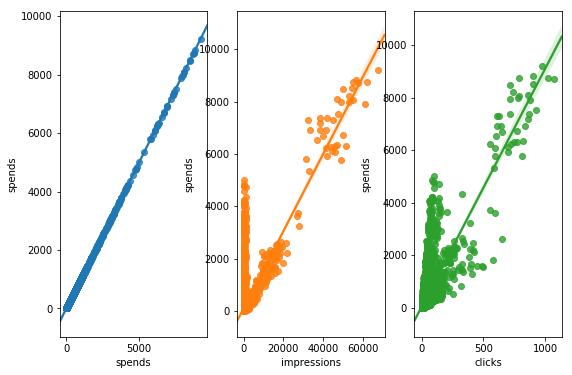

In [21]:
fig, ax = plt.subplots(round(len(quant_feature_list) / 3), 3, figsize = (9, 6))

for i, ax in enumerate(fig.axes):
    if i < len(quant_feature_list) - 1:
        sns.regplot(x=quant_feature_list[i],y='spends', data=df[quant_feature_list], ax=ax)

# Categorical to Quantitative relationship

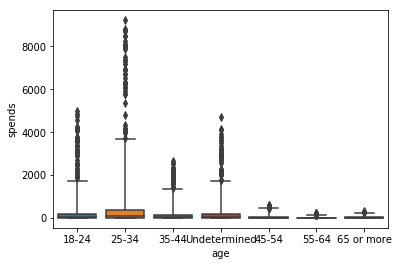

In [22]:
# Analyzing Which age people spending more

sns.boxplot(x='age', y='spends', data=df, whis=10)
plt.show()

In [23]:
# categorical_features = [a for a in quant_feature_list[:-1] + df.columns.tolist() if (a not in quant_feature_list) or (a not in df.columns.tolist())]
# df_categ = df[categorical_features]
# df_categ.head()

cat_feature_list = ['product', 'phase', 'campaign_platform', 'campaign_type','communication_medium', 'subchannel', 'audience_type', 'creative_type','creative_name', 'device', 'age','spends']
df_cat_values = df[cat_feature_list]
df_cat_values.head()


,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends
0,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00
1,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00
2,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00
3,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63
4,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31


(array([0, 1]), <a list of 2 Text xticklabel objects>)

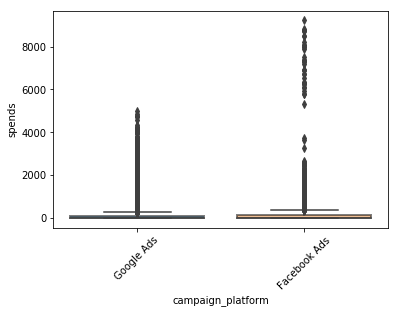

In [24]:
# Analysis od spends through ads category

plt.figure(figsize = (6, 4))
ax = sns.boxplot(x='campaign_platform', y='spends', data=df_cat_values)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

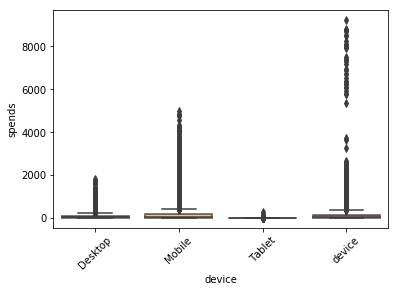

In [25]:
# Analysis of which device people generally using for spending money

plt.figure(figsize = (6, 4))
ax = sns.boxplot(x='device', y='spends', data=df_cat_values)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

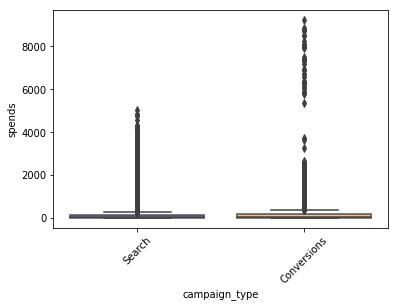

In [26]:
plt.figure(figsize = (6, 4))
ax = sns.boxplot(x='campaign_type', y='spends', data=df_cat_values)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

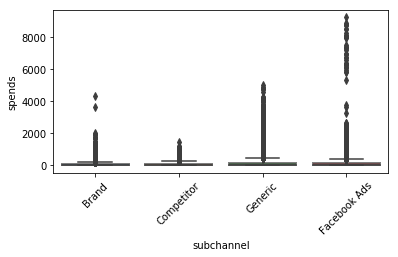

In [27]:
plt.figure(figsize = (6, 3))
ax = sns.boxplot(x='subchannel', y='spends', data=df_cat_values)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [28]:
# Relationship between spends and date

from datetime import datetime

df['Date'].tail(10)

16824    2020-07-07
16825    2020-07-07
16826    2020-07-07
16827    2020-07-07
16828    2020-07-07
16829    2020-07-07
16830    2020-07-07
16831    2020-07-07
16832    2020-07-07
16833    2020-07-07
Name: Date, dtype: object

In [29]:
date_data= df.set_index('Date')
date_data.index

Index(['2019-10-16', '2019-10-16', '2019-10-16', '2019-10-16', '2019-10-18',
       '2019-10-18', '2019-10-18', '2019-10-18', '2019-10-18', '2019-10-18',
       ...
       '2020-07-07', '2020-07-07', '2020-07-07', '2020-07-07', '2020-07-07',
       '2020-07-07', '2020-07-07', '2020-07-07', '2020-07-07', '2020-07-07'],
      dtype='object', name='Date', length=16834)

In [30]:
df['Date'].min(), df['Date'].max()

('2019-10-16', '2020-07-07')

# Making Machine Learning models

In [31]:
# Feature Selection

featured_data = df.drop(['product', 'campaign_type','communication_medium','phase','audience_type', 'creative_type','creative_name'], axis=1)

In [32]:
featured_data.head()

,Date,campaign_platform,subchannel,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Google Ads,Brand,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Google Ads,Brand,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Google Ads,Brand,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Google Ads,Brand,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Google Ads,Brand,Desktop,18-24,53.31,10,2,0.0


In [33]:
# Converting data into numeric

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [ ]:
labelEncoder = LabelEncoder()

labelEncoder.fit(featured_data['device'])
featured_data['device'] = labelEncoder.transform(featured_data['device'])

labelEncoder.fit(featured_data['age'])
featured_data['age'] = labelEncoder.transform(featured_data['age'])

labelEncoder.fit(featured_data['subchannel'])
featured_data['subchannel'] = labelEncoder.transform(featured_data['subchannel'])

# labelEncoder.fit(featured_data['date'])
# featured_data['date'] = labelEncoder.transform(featured_data['date'])

labelEncoder.fit(featured_data['campaign_plateform'])
featured_data['campaign_plateform'] = labelEncoder.transform(featured_data['campaign_plateform'])


In [ ]:
from sklearn.model_selection import train_test_split

x = featured_data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()


In [ ]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

In [ ]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))